# Clean Retail Dataset Hackathon 1

Import libraries for data analysis and manipulation so that the dataset can be cleaned and prepared for visualisation in PowerBI

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the retail dataset into a pandas dataframe called retail_raw.
Display the first 5 rows. 

In [2]:
#load dataset into pandas dataframe 
retail_raw = pd.read_csv("../data/retail_raw.csv")
#display first 5 rows
retail_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


## Initial data exploration

Here we made a pandas dataframe called before_summary which summarises the data. 
The new dataframe shows:
- the data types
- the number of null values 
- the number of not null values 
- and how many unique values there are in each column.

The dataframe before_summary will be compared to a dataframe after_summary which will show the same information after the cleaning process. 

In [3]:
# summarise the data with null values and unique values displayed in a dataframe
before_summary = pd.DataFrame({
    "dtype": retail_raw.dtypes,
    "missing_values": retail_raw.isnull().sum(),
    "non_missing": retail_raw.notnull().sum(),
    "unique_values": retail_raw.nunique()
})
before_summary

,dtype,missing_values,non_missing,unique_values
InvoiceNo,object,0,541909,25900
StockCode,object,0,541909,4070
Description,object,1454,540455,4223
Quantity,int64,0,541909,722
InvoiceDate,object,0,541909,23260
UnitPrice,float64,0,541909,1630
CustomerID,int64,0,541909,4372
Country,object,0,541909,38


#### Null Values
There are 1454 null values in the description column meaning that 1454 rows have a missing description. The reason for this is discussed in the cleaning steps below and these will be dealt with later on. 

The command .shape shows us the number of rows and columns in the dataframe. The number of rows is 541909 which is the same as the number of not null values in most of the columns (apart from description which has 1454 null values).

In [4]:
# show shape of pandas dataframe
retail_raw.shape

(541909, 8)

The describe method gives us summary statistics for the numerical columns in the dataframe. We can use this as a quick check for unrealistic values. 

In [5]:
#summary statistics of dataframe
retail_raw.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000
mean,9.552250,4.611114,15287.518434
std,218.081158,96.759853,1484.746041
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,14367.000000
50%,3.000000,2.080000,15287.000000
75%,10.000000,4.130000,16255.000000
max,80995.000000,38970.000000,18287.000000


### Data description

We notice that both the unit price and the quantity have values below 0 which we will need to investigate as these are both quantities that should not be below 0. We also notice that the quantity and unit price have high standard deviations with very high maximum values - much higher than the mean value. We will investigate both of these. 

### Change Invoice Date datatype to datetime

The InvoiceDate column contains the dates and times that transactions occured on the website. These are currently datatype object, but we want them to be datatime type which allows PowerBI to treat them as dates and times rather than just strings. This will facilitate our analysis. 

In [6]:
#convert InvoiceData to datetime type
retail_raw['InvoiceDate'] = pd.to_datetime(retail_raw['InvoiceDate'])
retail_raw.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object

### Check distribution of invoices by month and day

We can count the number of invoices by month and plot their distribution

ISSUE: THERE ARE TWO NOVEMBERS (and decembers? - 2010 and 2011) SO NEED TO SPLIT INTO DEC2010 and 2011

In [8]:
month_counts = retail_raw['InvoiceDate'].dt.month_name().value_counts()
month_counts

InvoiceDate
November     84711
December     68006
October      60742
September    50226
July         39518
May          37030
June         36874
March        36748
August       35284
January      35147
April        29916
February     27707
Name: count, dtype: int64

#### Visualise invoice distribution by day

Using value counts we can sum the number of invoices by each day of the week and vidualise them in a bar chart

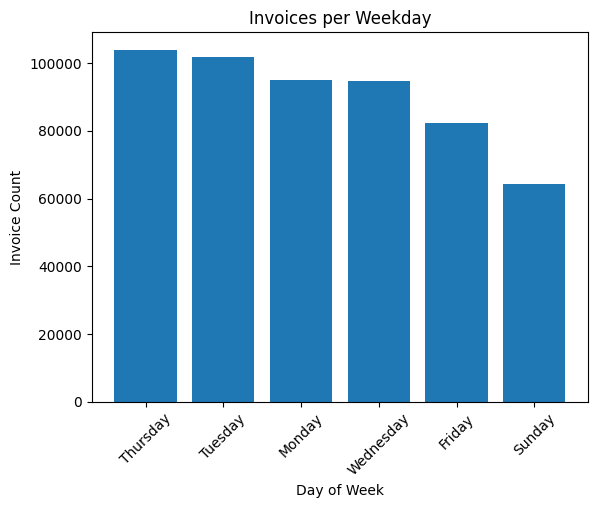

In [9]:
#create a pandas series which sums gives the number of invoices for each day of the week
weekday_counts = retail_raw['InvoiceDate'].dt.day_name().value_counts()

#plot a bar chart using matplotlib to show the distribution of sales across the week
plt.bar(weekday_counts.index, weekday_counts.values)
plt.xlabel('Day of Week')
plt.ylabel('Invoice Count')
plt.title('Invoices per Weekday')
plt.xticks(rotation=45)
plt.show()

As you can see from the bar chart, the busiest day for sales is Thursday with Sunday being the least busy. It is also interesting to note that the dataset does not include sales data for Saturday. 

### Handle Duplicates

Duplicate rows can be identified using the duplicated method, sum gives us the total number of duplicated rows

In [10]:
#sum duplicated rows
retail_raw.duplicated().sum()

np.int64(5268)

5268 duplicates found, we can drop them using drop_duplicates:

In [ ]:
#drop duplicates
retail_raw.drop_duplicates(inplace=True)
#number of duplicated rows 
retail_raw.duplicated().sum()

np.int64(0)

### Investigate Negative Quantity and UnitPrice Values

Non positive unit price can be removed and saved as a new dataframe

In [1]:
#keep only the unit price values which are above 0 and save them in a new dataframe called retail
retail = retail_raw[retail_raw['UnitPrice'] > 0]
#quick description to see the new minimum unit price
retail.describe()

NameError: name 'retail_raw' is not defined

As you can see from the above describe the minimum unit price is now above 0 which is expected.

Now we can look at the negative values for quantity

In [ ]:
#look at the top 10 values for quanntity which are below 0
retail[retail['Quantity'] < 0].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,2010-12-01 10:24:00,0.29,17548,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,2010-12-01 10:24:00,3.45,17548,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,2010-12-01 10:24:00,1.65,17548,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,2010-12-01 10:24:00,1.65,17548,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,2010-12-01 12:38:00,4.25,17897,United Kingdom


The invoices in this dataset are generally 6 digit numbers, apart from those which have negative quantity values. These all start with the letter C.
The C stands for cancellation, this [link](https://archive.ics.uci.edu/dataset/352/online+retail) provides some information. 

We have made the assumption that invoices that start with C are canceled orders and so represent orders that were never completed. By this we mean that the sale never occured and that no stock would have been sent to a customer. For this reason we are removing them from the dataset to focus on completed orders. 

In [ ]:
#delete all rows with invoices beginning with C
retail = retail[~retail['InvoiceNo'].str.startswith('C', na=False)]

retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,524878.000000,524878,524878.000000,524878.000000
mean,10.616600,2011-07-04 15:30:16.317049088,3.922573,15287.631345
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000
25%,1.000000,2011-03-28 12:13:00,1.250000,14375.000000
50%,4.000000,2011-07-20 11:22:00,2.080000,15287.000000
75%,11.000000,2011-10-19 11:41:00,4.130000,16245.000000
max,80995.000000,2011-12-09 12:50:00,13541.330000,18287.000000
std,156.280031,NaN,36.093028,1482.145530


Minimum quantity is now 1

### Handle Outliers

We will check quantity and unit price for outliers using a box plot and by using the interquartile range (IQR)

Display box plots display the median and IQR using a box with tails, points that are outside the box are then considered to be outliers. 

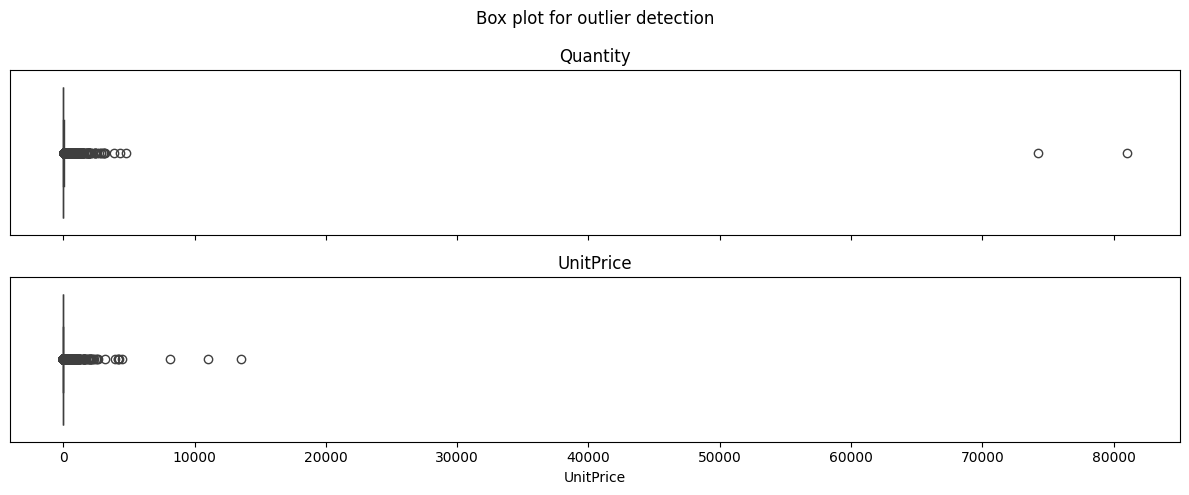

In [ ]:

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 5))

sns.boxplot(x=retail['Quantity'], ax=axes[0])
sns.boxplot(x=retail['UnitPrice'], ax=axes[1])

plt.suptitle("Box plot for outlier detection")

axes[0].set_ylabel("")
axes[1].set_ylabel("")
axes[0].set_yticks([])
axes[1].set_yticks([])



axes[0].set_title("Quantity")
axes[1].set_title("UnitPrice")

plt.tight_layout()
plt.show()

Check both columns for outliers:

In [ ]:
def check_outlier(s):
    """ Calculating inter quartile range and returning True or False"""
    q1, q3 = s.quantile([0.25, 0.75])
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    return (s < low) | (s > high)

retail['Quantity_Outlier'] = check_outlier(retail['Quantity'])
retail['UnitPrice_Outlier'] = check_outlier(retail['UnitPrice'])
retail[['Quantity_Outlier', 'UnitPrice_Outlier']].sum()

Quantity_Outlier     27111
UnitPrice_Outlier    37827
dtype: int64

In [ ]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Quantity_Outlier,UnitPrice_Outlier
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,False,False
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,False,False
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,False,False


Remove outliers:

In [ ]:
retail = retail[~retail['Quantity_Outlier']]
retail = retail[~retail['UnitPrice_Outlier']]

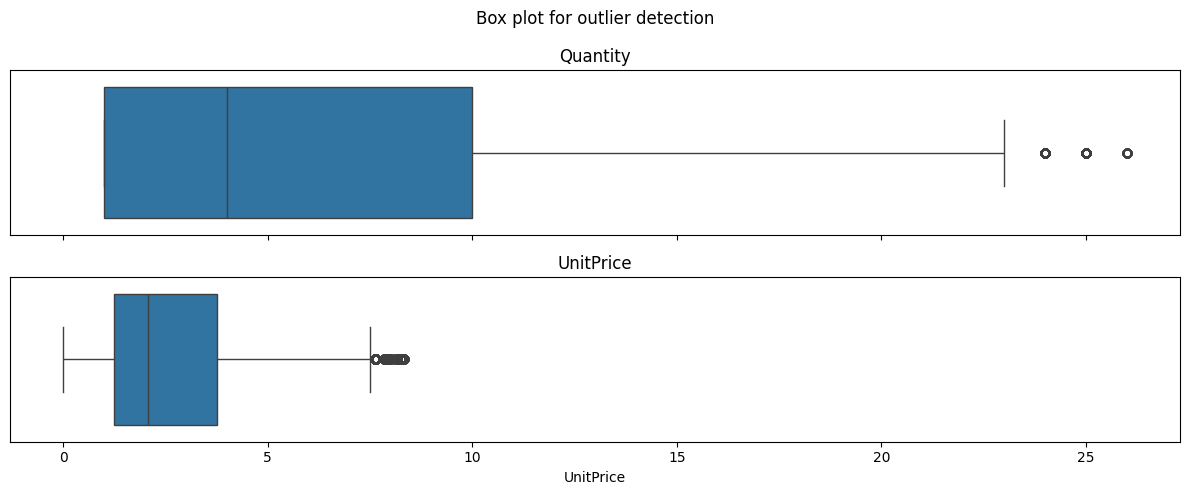

In [ ]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 5))

sns.boxplot(x=retail['Quantity'], ax=axes[0])
sns.boxplot(x=retail['UnitPrice'], ax=axes[1])

plt.suptitle("Box plot for outlier detection")

axes[0].set_ylabel("")
axes[1].set_ylabel("")
axes[0].set_yticks([])
axes[1].set_yticks([])



axes[0].set_title("Quantity")
axes[1].set_title("UnitPrice")

plt.tight_layout()
plt.show()

Drop the outlier columns now they have been used to remove outliers:

In [ ]:
retail = retail.drop(columns=['Quantity_Outlier', 'UnitPrice_Outlier'])
retail.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,460251.000000,460251,460251.000000,460251.000000
mean,6.182157,2011-07-05 22:11:46.295260928,2.599133,15309.297257
min,1.000000,2010-12-01 08:26:00,0.001000,12347.000000
25%,1.000000,2011-03-29 12:55:00,1.250000,14415.000000
50%,4.000000,2011-07-21 12:15:00,2.080000,15287.000000
75%,10.000000,2011-10-20 09:57:00,3.750000,16303.000000
max,26.000000,2011-12-09 12:50:00,8.330000,18287.000000
std,6.396944,NaN,1.929225,1479.257330


Add new date and time column from the invoice datetime column

In [ ]:
retail['InvoiceDate_time'] = retail['InvoiceDate'].dt.time
retail['InvoiceDate_date'] = retail['InvoiceDate'].dt.date
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_time,InvoiceDate_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,08:26:00,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,08:26:00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01


Add day part bins

In [ ]:
bins = [0, 6, 11, 14, 17, 21, 24]
labels = ['Night', 'Morning', 'Lunch', 'Afternoon', 'Evening', 'Late']
retail['daypart'] = pd.cut(retail['InvoiceDate'].dt.hour, bins=bins, labels=labels, right=False)

show the new field

In [ ]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_time,InvoiceDate_date,daypart
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,08:26:00,2010-12-01,Morning
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,08:26:00,2010-12-01,Morning
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,12:50:00,2011-12-09,Lunch
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12:50:00,2011-12-09,Lunch
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12:50:00,2011-12-09,Lunch
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12:50:00,2011-12-09,Lunch


Add total transaction value

In [ ]:
retail['TotalTransacrtionValue'] = retail['Quantity'] * retail['UnitPrice']
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_time,InvoiceDate_date,daypart,TotalTransacrtionValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,08:26:00,2010-12-01,Morning,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,08:26:00,2010-12-01,Morning,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning,20.34
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,12:50:00,2011-12-09,Lunch,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12:50:00,2011-12-09,Lunch,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,12:50:00,2011-12-09,Lunch,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,12:50:00,2011-12-09,Lunch,16.60


Standadise case on product code

In [ ]:
retail['StockCode'] = retail['StockCode'].str.upper().str.strip()

anomynise the customer

In [ ]:
unique_customers = retail['CustomerID'].unique()
customer_map = {num: f'Customer-{i+1}' for i, num in enumerate(unique_customers)}

retail['anon_customer'] = retail['CustomerID'].map(customer_map)

retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_time,InvoiceDate_date,daypart,TotalTransacrtionValue,anon_customer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,08:26:00,2010-12-01,Morning,15.30,Customer-1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning,20.34,Customer-1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,08:26:00,2010-12-01,Morning,22.00,Customer-1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning,20.34,Customer-1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,08:26:00,2010-12-01,Morning,20.34,Customer-1


drop cusotmer id

In [ ]:
retail = retail.drop(columns=['CustomerID'])
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country,InvoiceDate_time,InvoiceDate_date,daypart,TotalTransacrtionValue,anon_customer
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,08:26:00,2010-12-01,Morning,15.30,Customer-1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,08:26:00,2010-12-01,Morning,20.34,Customer-1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,08:26:00,2010-12-01,Morning,22.00,Customer-1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,08:26:00,2010-12-01,Morning,20.34,Customer-1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,08:26:00,2010-12-01,Morning,20.34,Customer-1


Create after summary:

In [ ]:
after_summary = pd.DataFrame({
    "dtype": retail.dtypes,
    "missing_values": retail.isnull().sum(),
    "non_missing": retail.notnull().sum(),
    "unique_values": retail.nunique()
})

View before summary again:

In [ ]:
before_summary

,dtype,missing_values,non_missing,unique_values
InvoiceNo,object,0,541909,25900
StockCode,object,0,541909,4070
Description,object,1454,540455,4223
Quantity,int64,0,541909,722
InvoiceDate,object,0,541909,23260
UnitPrice,float64,0,541909,1630
CustomerID,int64,0,541909,4372
Country,object,0,541909,38


view after summary:

In [ ]:
after_summary

,dtype,missing_values,non_missing,unique_values
InvoiceNo,object,0,460251,18276
StockCode,object,0,460251,3609
Description,object,0,460251,3800
Quantity,int64,0,460251,26
InvoiceDate,datetime64[ns],0,460251,17027
UnitPrice,float64,0,460251,285
Country,object,0,460251,38
InvoiceDate_time,object,0,460251,734
InvoiceDate_date,object,0,460251,305
daypart,category,0,460251,4


Save cleaned csv file

In [ ]:
retail.to_csv("../data/retail_clean.csv", index=False)

Create sales fact table

In [ ]:
sales_fact = retail.copy()[['InvoiceNo', 'StockCode', 'Quantity', 'UnitPrice', 'TotalTransacrtionValue', 'anon_customer', 'InvoiceDate_time', 'InvoiceDate_date', 'daypart']]
sales_fact.to_csv("../data/FactSales.csv", index=False)

Create product dimension table

In [ ]:
dim_product = (
    retail.groupby('StockCode')['Description']
    .agg(lambda x: x.value_counts().index[0])  # most frequent description
    .reset_index()
    .sort_values('StockCode')
)

dim_product.to_csv("../data/DimProduct.csv", index=False)

Create customer dimention table and add continent

In [ ]:
continent_map = {
    'United Kingdom': 'Europe',
    'France': 'Europe',
    'Germany': 'Europe',
    'Norway': 'Europe',
    'Switzerland': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Italy': 'Europe',
    'Belgium': 'Europe',
    'Lithuania': 'Europe',
    'Iceland': 'Europe',
    'Denmark': 'Europe',
    'Cyprus': 'Europe',
    'Spain': 'Europe',
    'Finland': 'Europe',
    'Austria': 'Europe',
    'Sweden': 'Europe',
    'Netherlands': 'Europe',
    'Greece': 'Europe',
    'Channel Islands': 'Europe',
    'EIRE': 'Europe',  # Ireland
    'European Community': 'Europe',
    'Malta': 'Europe',
    'Czech Republic': 'Europe',
    'USA': 'North America',
    'Canada': 'North America',
    'Brazil': 'South America',
    'Israel': 'Middle East',
    'Lebanon': 'Middle East',
    'Saudi Arabia': 'Middle East',
    'United Arab Emirates': 'Middle East',
    'Bahrain': 'Middle East',
    'Japan': 'Asia',
    'Hong Kong': 'Asia',
    'Singapore': 'Asia',
    'Australia': 'Oceania',
    'RSA': 'Africa',
    'Unspecified': 'Unknown'
}


dim_customer = (
    retail.groupby('anon_customer')
    .agg(
          FirstPurchaseDate=('InvoiceDate', 'min'),
          Country=('Country', 'first')
      )
      .reset_index()   
)

dim_customer['FirstPurchaseYear'] = dim_customer['FirstPurchaseDate'].dt.year
dim_customer['FirstPurchaseMonth'] = dim_customer['FirstPurchaseDate'].dt.month
dim_customer['FirstPurchaseYearMonth'] = dim_customer['FirstPurchaseDate'].dt.strftime('%Y-%m')
dim_customer['Continent'] = dim_customer['Country'].map(continent_map).fillna('Other')
dim_customer.to_csv("../data/DimCustomer.csv", index=False)

Create date dimention table

In [ ]:
date_range = pd.date_range(retail['InvoiceDate'].min(), retail['InvoiceDate'].max())

dim_date = pd.DataFrame({'Date': date_range})
dim_date['Year'] = dim_date['Date'].dt.year
dim_date['Quarter'] = dim_date['Date'].dt.to_period('Q').astype(str)
dim_date['MonthNumber'] = dim_date['Date'].dt.month
dim_date['MonthName'] = dim_date['Date'].dt.strftime('%B')
dim_date['DayOfMonth'] = dim_date['Date'].dt.day
dim_date['DayOfWeekNumber'] = dim_date['Date'].dt.weekday + 1
dim_date['DayOfWeekName'] = dim_date['Date'].dt.strftime('%A')
dim_date['IsWeekend'] = dim_date['DayOfWeekNumber'] >= 6
dim_date['YearMonth'] = dim_date['Date'].dt.strftime('%Y-%m')
dim_date['Date'] = dim_date['Date'].dt.date

dim_date.to_csv("../data/DimDate.csv", index=False)

Create day part dimention

In [ ]:
bins = [0, 6, 11, 14, 17, 21, 24]
labels = ['Night', 'Morning', 'Lunch', 'Afternoon', 'Evening', 'Late']

dim_daypart = pd.DataFrame({
    'daypart': labels,
    'StartHour': bins[:-1],
    'EndHour': bins[1:]
})

dim_daypart['HoursInBin'] = dim_daypart['EndHour'] - dim_daypart['StartHour']
dim_daypart.to_csv("../data/DimDayPart.csv", index=False)